# Keras Project - Predicting Borrower Loan Defaults
---
#### Abstract: 
The best "f1_score" for "class 0" of 66% was acheieved using an "Artifical Neural Network" (ANN) with random oversampling of the dataset, to mitigate against the clear imbalances in the dataset. However by focusing the predictive power of the model on the "f1_score" for "class 0" there has been compromises in the performance of the model in other areas. However as the objective of this project was focused on predicting borrower defaults, such a compromises is considered acceptable.
<br>

## Section 1: Project Introduction 
---

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Using historical data on loans that has information on whether or not a borrower defaulted (charge-off), we will build a model that can predict wether or nor a borrower will pay back their loan. This will allow the compnay to have an ability to predict if a new potential customer is likely to pay back the loan.

<br>

## Section 2: Data Overview
---

There are many LendingClub data sets on Kaggle but for this project we will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

### Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# function to display full description of the values in 'LoanStatNew'
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
def feat_info2(col_name):
    feature = data_info.loc[col_name]['Description']
    return feature

# load main dataset
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

pd.set_option('display.max_colwidth', 0)

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<br>

## Section 3: Exploratory Data Analysis
----
**We will now carry out exploratory data analysis to gain an understanding of which variables are important and to summarize the main characterisitcs, mainly with visual methods.**

### Section 3.1:

> As we are trying to predict wether or not a borrower will pay back their loan, we will begin with a review of the loan statuse's of all the loans in the dataset. From the countplot and the calculation beneath we can asertain that this dataset is an imbalanced dataset, that will have certain implications later on in this project, and that <font color=red>**19.6% of loans have defaulted (Charged Off)!**</font> 

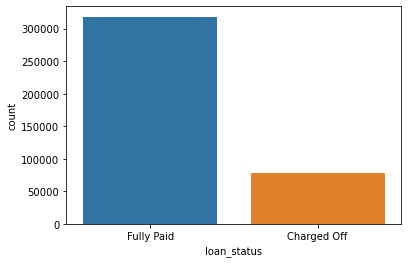

In [3]:
sns.countplot(x='loan_status',data=df)

In [4]:
df['loan_status'].loc[df['loan_status'] == 'Charged Off'].count()/df['loan_status'].count()

0.1961290811302174

---
### **Section 3.2**: 

> When reviewing the size of the loans with the number of loans for each respective loan amount, no particular trends can be observed from this visualisation that can would likely assist in predicting if a borrower would default or not. The observations are as follows:
- The histogram shows that we get the peak number of loans at around the loan amount of USD 10000 with subsequent smaller peaks at approximately USD 5000 intervals all the way up to USD 35000. An indication of standard loan sizes that is being offered.
- Borrower default rate is approximately similar irrespective of loan amount.

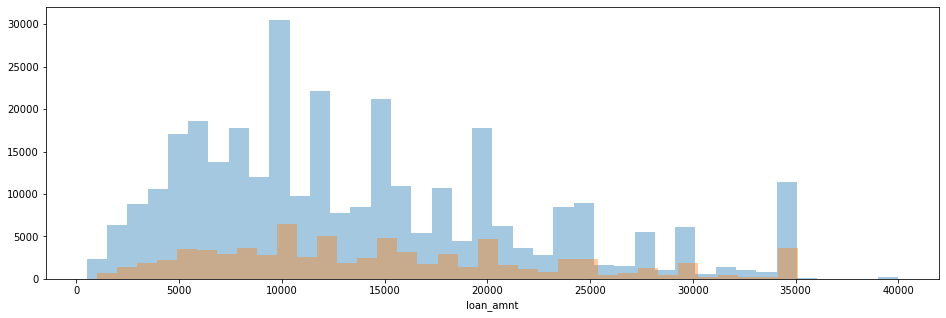

In [5]:
plt.figure(figsize=(16,5))

# Sort the dataframe by target
target_0 = df['loan_amnt'].loc[df['loan_status'] == 'Charged Off']
target_1 = df['loan_amnt'].loc[df['loan_status'] == 'Fully Paid']

sns.distplot(target_1, kde=False, bins=40)
sns.distplot(target_0, kde=False, bins=40)

---
### **Section 3.3**: 

> Let's explore correlation between the continuous feature variables. Reviewing the heatmap visualisation below you can see that there is high correlation between the "loan_amnt" and "installment" feature. This would make sense as the monthly payment is highly related to the loan amount. 

(10.0, 0.0)

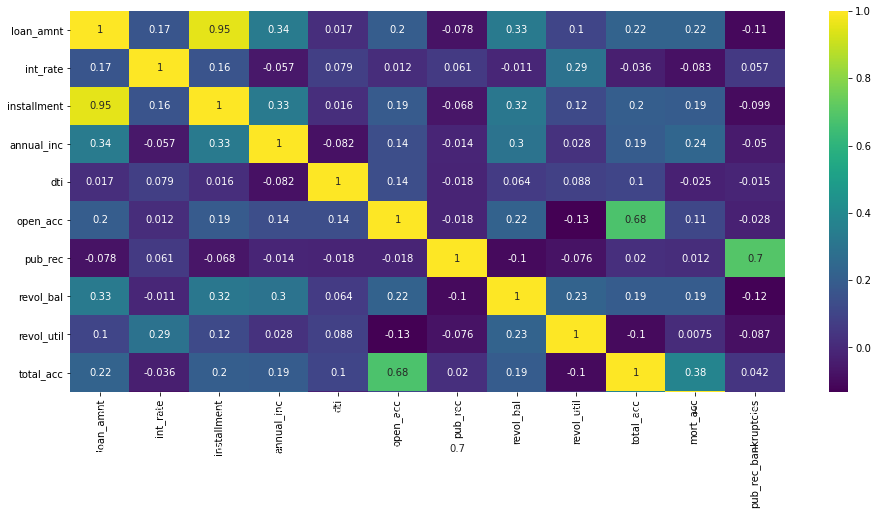

In [6]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [7]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [8]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


---
### **Section 3.4**: 

> Continuing the exploration of the two highly correlated features, discussed in 3.3 just above, using a scatterplot we observe relatively sharp and straight cutoffs which indicates a standard formula at play used to calculate monthly "installment" size based on "loan_amnt" plus some likely variables such as "term" and "int_rate".

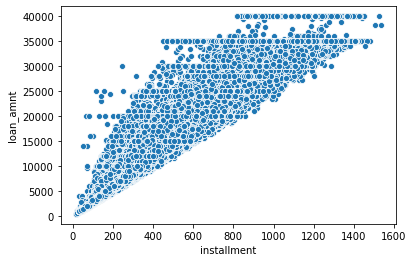

In [9]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

In [10]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [11]:
feat_info('int_rate')

Interest Rate on the loan


---
###  **Section 3.5**: 

> The boxplot and above below confirms what was noted in the historgram in 3.2 above, that although the defaulted (Charged Off) loans are slighty higher in value that "Fully Paid" loans, that the "loan_amnt" feature would not a good predictor on if a borrower will default or not due to difference between the two is actually minimal. 

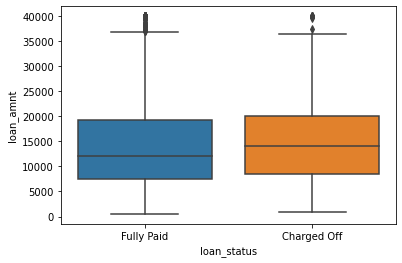

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


---
### **Section 3.6**: 

> Review of the "grade" and "subgrade" features we observe that the number of loans for better grade loans (less risky) are more numerous and therefore as expected there are less (proportionally) borrower defaults. Grades F (higher risk) onwards are much less numerous and its clear that borrow defaults are much higher. 

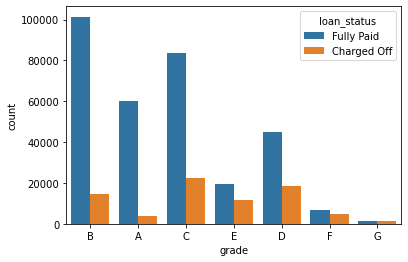

In [14]:
sns.countplot(x='grade',data=df,hue='loan_status')

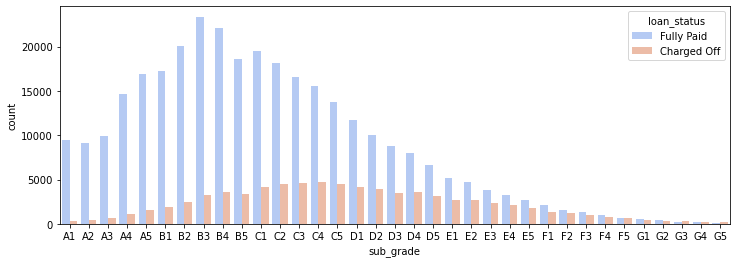

In [15]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

---
### **Section 3.7**:

> An exploded view of the F and G subgrades below shows in greater detail the number of loans in each subgrade that are either "Fully Paid" or "Charged Off". 

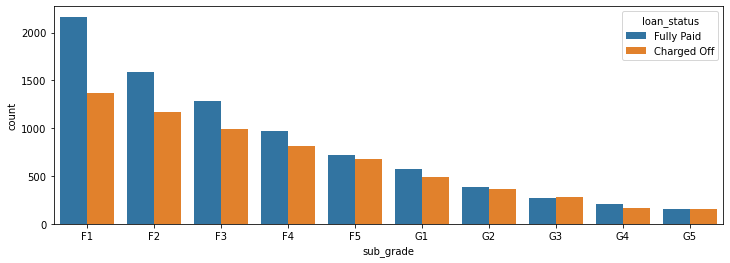

In [16]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

---
### **Section 3.8**: 

> "int_rate" is the highest correlated feature against the "Charged Off", this is also logical as the higher the <font color=red>**Interest Rate of a loan**</font> the more difficult it would be for the borrower to pay off. 

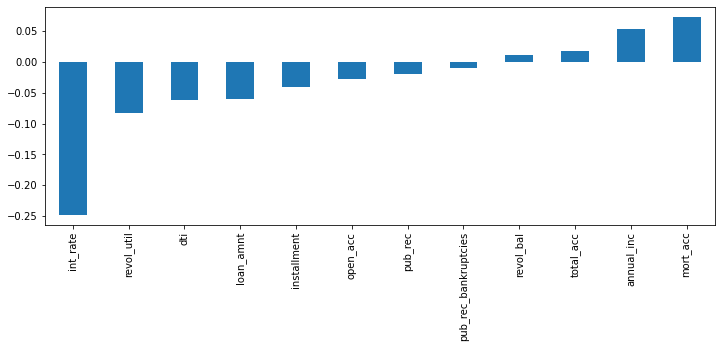

In [17]:
plt.figure(figsize=(12,4))
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<br>

## Section 4: Data PreProcessing
---

Real world datasets will invariable require preprocessing before to clean up the data before it can be used in machine learning algorithms. In the following few sections we will carry out preprocessing of the data in this project.



In this section we will explore columns with missing data and decide whether or not they would be useful so as to see if we should keep, discard, or fill in the missing data. The following table of features contain missing data and has been formatted to show this as a percentage of the length of the dataframe.

In [18]:
feature_details=100* df.loc[:,df.isnull().sum() > 0].isnull().sum()/len(df)
features=feature_details.index
df_miss = pd.DataFrame(feature_details.values, index=features, columns=['Percentage'])
df_miss['Description']=feat_info2(df_miss.index)
df_miss

,Percentage,Description
emp_title,5.789208,The job title supplied by the Borrower when applying for the loan.*
emp_length,4.621115,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
title,0.443148,The loan title provided by the borrower
revol_util,0.069692,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
mort_acc,9.543469,Number of mortgage accounts.
pub_rec_bankruptcies,0.135091,Number of public record bankruptcies


### Section 4.1: Locate Missing Data - Handling Features emp_title and emp_length

> We will examine emp_title and emp_length to see whether it will be okay to drop them. The next code cell is the full decriptions for each of the subject features.

In [19]:
df['emp_title'].nunique()

173105

> **Feature - 'emp_title'**: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. So we will remove that "emp_title" column.

In [20]:
df = df.drop('emp_title',axis=1)

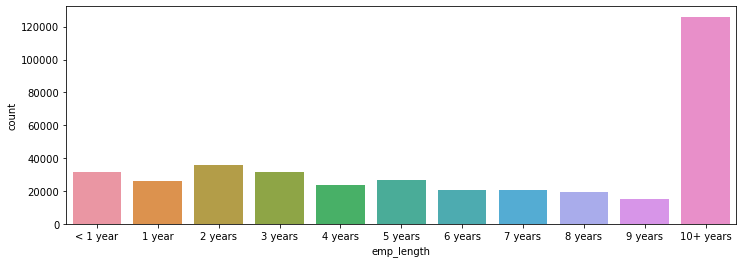

In [21]:
sorted(df['emp_length'].dropna().unique())
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

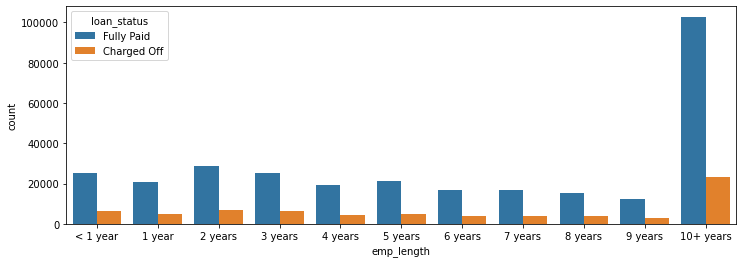

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

> **Feature - 'emp_length':** Review of the above count plots seems to indicate that there doesn't seem to be strong relationship between employment length and borrower defaults (charged off). We will confirm this by calculating the percentage of deefaults per employment length catergory.

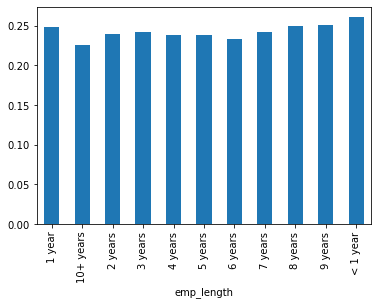

In [23]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len
emp_len.plot(kind='bar')

> **Feature - 'emp_length':** Default rates are extremely similar across all employment lengths. Therefore as this is not a useful feature to predict defaults we will drop the emp_length column.

In [24]:
df = df.drop('emp_length',axis=1)

### **Section 4.2:** Handling Other Missing Data Features
> A revisit the DataFrame to see what feature columns still have missing data shows four remaining features, which we will process in this sub-section.

In [25]:
feature_details=100* df.loc[:,df.isnull().sum() > 0].isnull().sum()/len(df)
features=feature_details.index
df_miss = pd.DataFrame(feature_details.values, index=features, columns=['Percentage'])
df_miss['Description']=feat_info2(df_miss.index)
df_miss

,Percentage,Description
title,0.443148,The loan title provided by the borrower
revol_util,0.069692,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
mort_acc,9.543469,Number of mortgage accounts.
pub_rec_bankruptcies,0.135091,Number of public record bankruptcies


In [26]:
df['purpose'].head(10)

0    vacation          
1    debt_consolidation
2    credit_card       
3    credit_card       
4    credit_card       
5    debt_consolidation
6    home_improvement  
7    credit_card       
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [27]:
df['title'].head(10)

0    Vacation               
1    Debt consolidation     
2    Credit card refinancing
3    Credit card refinancing
4    Credit Card Refinance  
5    Debt consolidation     
6    Home improvement       
7    No More Credit Cards   
8    Debt consolidation     
9    Debt Consolidation     
Name: title, dtype: object

> **Feature - 'title'**: The title column is simply a string subcategory/description of the purpose column, therefore we will go ahead and drop the title column.

In [28]:
df = df.drop('title',axis=1)

> **Feature - 'mort_acc':** 'mort acc' represents one the features with the highest amount of missing data.

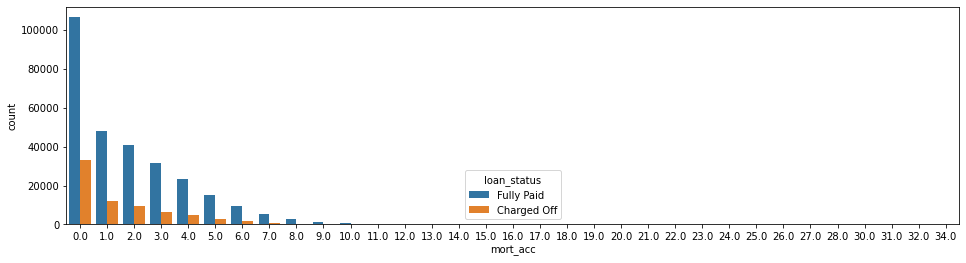

In [29]:
plt.figure(figsize=(16,4))
sns.countplot(x='mort_acc',data=df,hue='loan_status')

> **Feature - 'mort_acc':** We will attempt to build a simple linear model and fill in the missing data based on the mean of the of another column.

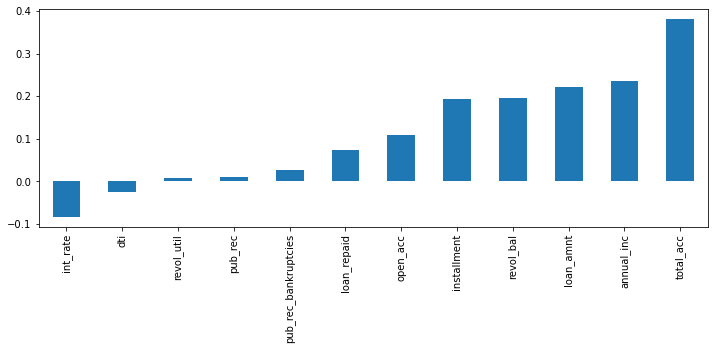

In [30]:
plt.figure(figsize=(12,4))
df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')

> **Feature - 'mort_acc':** Looking at the above total_acc feature correlates with the mort_acc , this makes sense! We will group the dataframe by the total_acc and calculate the rounded mean value for the mort_acc per total_acc entry and replace the NA values with this new value.

In [31]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg rounded mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [32]:
total_acc_avg = df.groupby('total_acc').mean().round()['mort_acc']
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

> **Feature - 'mort_acc':** Below is an updated countplot with all the NA filled in.

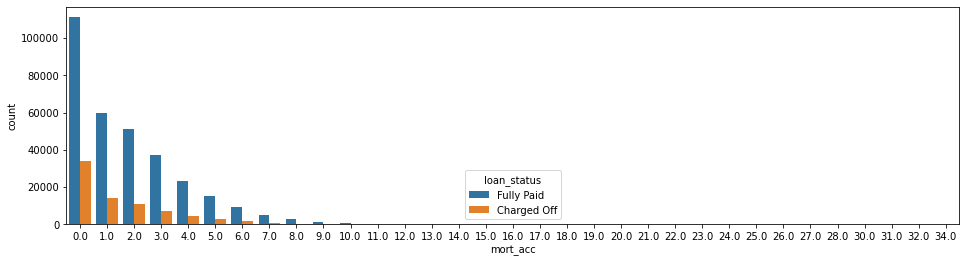

In [33]:
plt.figure(figsize=(16,4))
sns.countplot(x='mort_acc',data=df,hue='loan_status')

In [34]:
feature_details=100* df.loc[:,df.isnull().sum() > 0].isnull().sum()/len(df)
features=feature_details.index
df_miss = pd.DataFrame(feature_details.values, index=features, columns=['Percentage'])
df_miss['Description']=feat_info2(df_miss.index)
df_miss

,Percentage,Description
revol_util,0.069692,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
pub_rec_bankruptcies,0.135091,Number of public record bankruptcies


> **Feature - 'revol_util' and 'pub_rec_bankruptcies':**  revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we will drop these columns.

In [35]:
df = df.dropna()

### Section: 4.3 Categorical Variables and Feature Engineering

> Now we have to deal with the the object type columns, some of which will be converted into numerical values or new features to support our prediction model and some of which we will dropped.

In [36]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

> **Feature - 'Term feature':** We will convert the term feature into either a 36 or 60 integer numeric data type.

In [37]:
df['term'].value_counts()

 36 months    301247
 60 months    93972 
Name: term, dtype: int64

In [38]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

> **Feature - 'Grade feature':** We already know grade is part of sub_grade, so just drop the grade feature and  convert each of the observations in the subgrade feature into new columns.

In [39]:
df = df.drop('grade',axis=1)
subgrade_dummies = pd.get_dummies(df['sub_grade'])
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

In [40]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

> **Feature - 'verification_status, application_type,initial_list_status,purpose':** Convert each of the unique observations for each feature into new colummns and then drop the original columns for each feature.

In [41]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

> **Feature - 'home_ownership':** Revewing the value_counts for the home_ownership column we see that the unique observations ANY and OTHER can be combined, so that we end up with just 5 categories, MORTGAGE, RENT, OWN, NONE, OTHER. Then as per features above columns can be created.

In [42]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN         37660 
OTHER       110   
NONE        29    
ANY         3     
Name: home_ownership, dtype: int64

In [43]:
df['home_ownership']=df['home_ownership'].replace(['ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'])
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

> **Feature - 'address':**  We will feature engineer a zip code column from the address in the data set and then convert each unique observation into a new column as per the features above.

In [44]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [45]:
dummies = pd.get_dummies(df['zip_code'])
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

> **Feature - 'issue_d':** This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date therefore we will drop this feature.

In [46]:
df = df.drop('issue_d',axis=1)

> **Feature - 'earliest_cr_line':** This appears to be a historical time stamp feature, we will extract the year from this feature, then convert it to a numeric feature and set this new data to a feature column called 'earliest_cr_year'.

In [47]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [48]:
df = df.drop('loan_status',axis=1)

In [49]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

<br>

## Section 5: Build Model
---

We will now build Artificial Neural Network (ANN) model to allow us to predict if a borrower would potentially default on their loan. First of all we will import all the required libraries with a special note that we will use "plaidml.keras.backend" to allow my AMD GPU on my Mac to speed up training of the models.

In [50]:
import os
import tempfile
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import models
from keras import backend as K

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, make_scorer

import matplotlib as mpl
import matplotlib.pyplot as plt

Using plaidml.keras.backend backend.


### 5.1 Train Test Split

> Before building the ANN we will need to use train_test_split from sklearn to split the dataset into a seperate training and testing, for final validation test run, sets. It is worth noting that both "stratify" and "shuffle" are set to "y" and "true" respectively. The ‘stratify’ parameter aims to split the data set so that each split is similar with respect to each of the classes, therefore ensuring that the train and test sets have approximately the same percentage of samples of each target class.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, 
                                                    stratify=y, shuffle=True)

### 5.2  Normalizing the Data

> Before building and training the model we will also need to use a MinMaxScaler to normalize the feature data on both the training and testing data set.

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5.3  Imbalanced Data

> Using the class weight technical to try to account for the imbalance dataset to increase the predictive power of the model.

In [57]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

/Users/manchhui/opt/anaconda3/envs/tf_2/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass classes=[0 1], y=[1 1 1 ... 1 0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [58]:
class_weights

array([2.54905834, 0.62200726])

### 5.4 Creating First Model

> We will create a standard ANN model with a single hidden layer with matching number of nerons in the input and hidden layer. We will run this for 200 epochs and review the results.

In [59]:
classifier = Sequential()
classifier.add(Dense(units = 83, kernel_initializer = 'uniform', activation = 'relu', input_shape=(X_train.shape[-1],)))
# Adding the second hidden layer
classifier.add(Dense(units = 83, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'accuracy'])

INFO:plaidml:Opening device "metal_amd_radeon_pro_5300m.0"


In [60]:
# Fitting the ANN to the training set
history1 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 512, 
                          epochs = 200, verbose = 0)

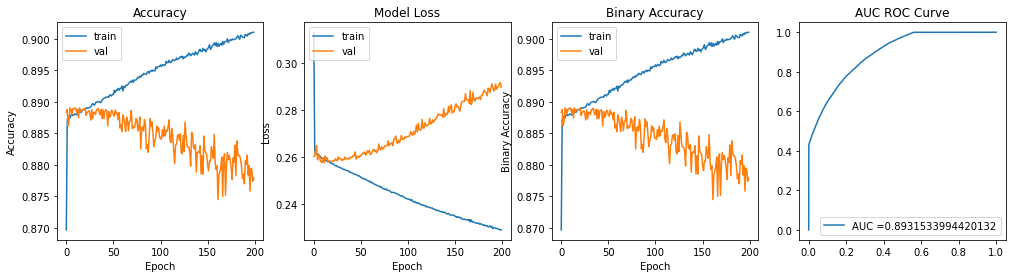

In [61]:
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(17,4))
plt.subplot(1, 4, 1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 4, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 4, 3)
plt.plot(history1.history['binary_accuracy'])
plt.plot(history1.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 4, 4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.title('AUC ROC Curve')
plt.legend(loc=4)
plt.show()

> **Evaluate First Model Performance:** On our first model the results show that there is already some overfitting as after the about the 20th epoch the accuracy on the validation dataset starts decreasing, while the loss goes up. 

### 5.5 Second Model

> Next I will introduce "Class weights", a variable to help the model learn from the imbalanced data and hopefully improve the performance.

In [62]:
history2 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 512, 
                          epochs = 150, verbose = 0, class_weight=class_weights)

In [63]:
history2.model.save('history2_project_model.h5')

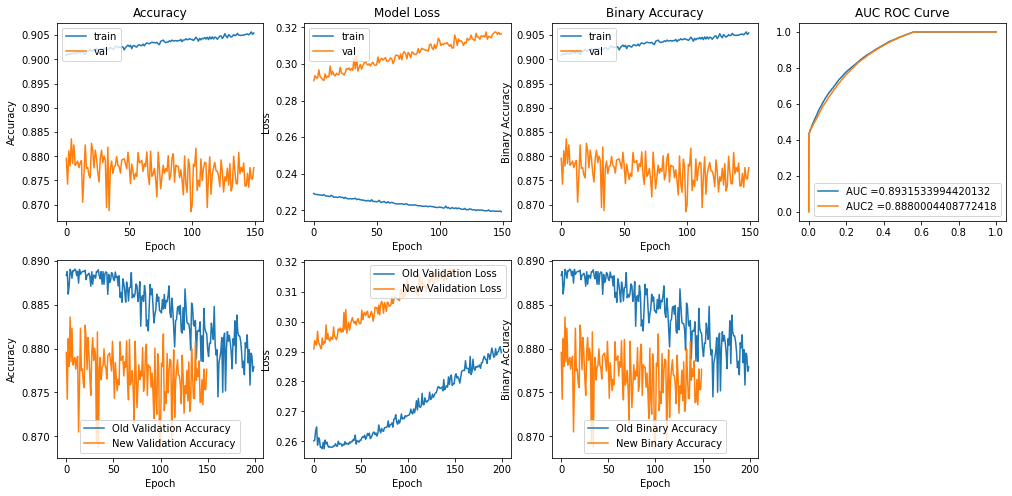

In [64]:
y_pred_proba2 = classifier.predict_proba(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)
auc2 = roc_auc_score(y_test, y_pred_proba2)

plt.figure(figsize=(17,8))
plt.subplot(2, 4, 1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(2, 4, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(2, 4, 3)
plt.plot(history2.history['binary_accuracy'])
plt.plot(history2.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

# Comparing old and new charts
plt.subplot(2, 4, 5)
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Validation Accuracy', 'New Validation Accuracy'], loc='lower center')

plt.subplot(2, 4, 6)
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Old Validation Loss', 'New Validation Loss'], loc='upper right')

plt.subplot(2, 4, 7)
plt.plot(history1.history['val_binary_accuracy'])
plt.plot(history2.history['val_binary_accuracy'])
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Binary Accuracy', 'New Binary Accuracy'], loc='lower center')

plt.subplot(2, 4, 4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.plot(fpr2,tpr2,label="AUC2 ="+str(auc2))
plt.title('AUC ROC Curve')
plt.legend(loc=4)

> **Evaluate Second Model Performance:**  Signs of overfitting still evident with training accuracy decreasing overtime and loss increasing overtime. However "class weights" hasn't improved the models performance.

### 5.6 Third Model

> To deal with the overfitting we will now look at adding a L2 regularization parameter.

In [65]:
keras.backend.clear_session()

In [66]:
classifier_l2 = Sequential()
classifier_l2.add(Dense(units = 83, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(X_train.shape[-1],)))
# Adding the second hidden layer
classifier_l2.add(Dense(units = 83, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
# Adding the output layer
classifier_l2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

INFO:plaidml:Opening device "metal_amd_radeon_pro_5300m.0"


In [67]:
# Compiling the ANN
classifier_l2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'accuracy'])
history_l2 = classifier_l2.fit(X_train, y_train, validation_split=0.2, batch_size = 512, 
                               epochs = 200, class_weight=class_weights, verbose = 0)

In [68]:
history_l2.model.save('history_l2_project_model.h5')

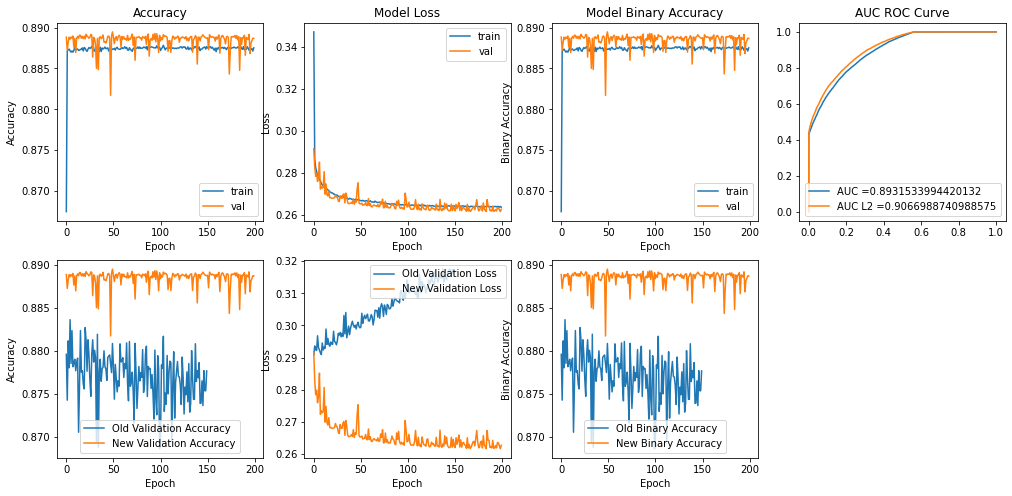

In [69]:
y_pred_proba_l2 = classifier_l2.predict_proba(X_test)
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_pred_proba_l2)
auc_l2 = roc_auc_score(y_test, y_pred_proba_l2)

plt.figure(figsize=(17,8))
plt.subplot(2, 4, 1)
plt.plot(history_l2.history['acc'])
plt.plot(history_l2.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2, 4, 2)
plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(2, 4, 3)
plt.plot(history_l2.history['binary_accuracy'])
plt.plot(history_l2.history['val_binary_accuracy'])
plt.title('Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')

# Comparing old and new charts
plt.subplot(2, 4, 5)
plt.plot(history2.history['val_acc'])
plt.plot(history_l2.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Validation Accuracy', 'New Validation Accuracy'], loc='lower center')

plt.subplot(2, 4, 6)
plt.plot(history2.history['val_loss'])
plt.plot(history_l2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Old Validation Loss', 'New Validation Loss'], loc='upper right')

plt.subplot(2, 4, 7)
plt.plot(history2.history['val_binary_accuracy'])
plt.plot(history_l2.history['val_binary_accuracy'])
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Binary Accuracy', 'New Binary Accuracy'], loc='lower center')

plt.subplot(2, 4, 4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.plot(fpr_l2,tpr_l2,label="AUC L2 ="+str(auc_l2))
plt.title('AUC ROC Curve')
plt.legend(loc=4)

In [70]:
# Making predictions
y_pred_l2 = classifier_l2.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l2))

[[ 6847  8658]
 [   35 63504]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15505
           1       0.88      1.00      0.94     63539

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



> **Evaluate Third Model Performance:**  Just with the L2 regularization parameter the overfitting is now not evident and model performance has increased. A review of the classification report shows that we could still improve the "f1-score" for class "0" which is the object of this project.

### 5.7 Fourth Model

> Next lets introduce another regularization parameter "dropout" to see what improvements we can bring.

In [71]:
classifier_l2_drop = Sequential()

# rebuilding this time doing dropout for every layer
classifier_l2_drop.add(Dense(units = 83, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(X_train.shape[-1],)))
classifier_l2_drop.add(Dropout(0.1)) # meaning 10% will be dropped duting the learning stage
classifier_l2_drop.add(Dense(units = 83, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
classifier_l2_drop.add(Dropout(0.1))
classifier_l2_drop.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_l2_drop.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'accuracy'])

# Fitting the ANN to the Training set (No early Stopping)
history_l2_drop = classifier_l2_drop.fit(X_train, y_train, validation_split=0.2, batch_size = 512, 
                                         epochs = 200, class_weight=class_weights, verbose = 0)

In [72]:
y_pred_proba_l2_drop = classifier_l2_drop.predict_proba(X_test)
fpr_l2_drop, tpr_l2_drop, thresholds_l2_drop = roc_curve(y_test, y_pred_proba_l2_drop)
auc_l2_drop = roc_auc_score(y_test, y_pred_proba_l2_drop)

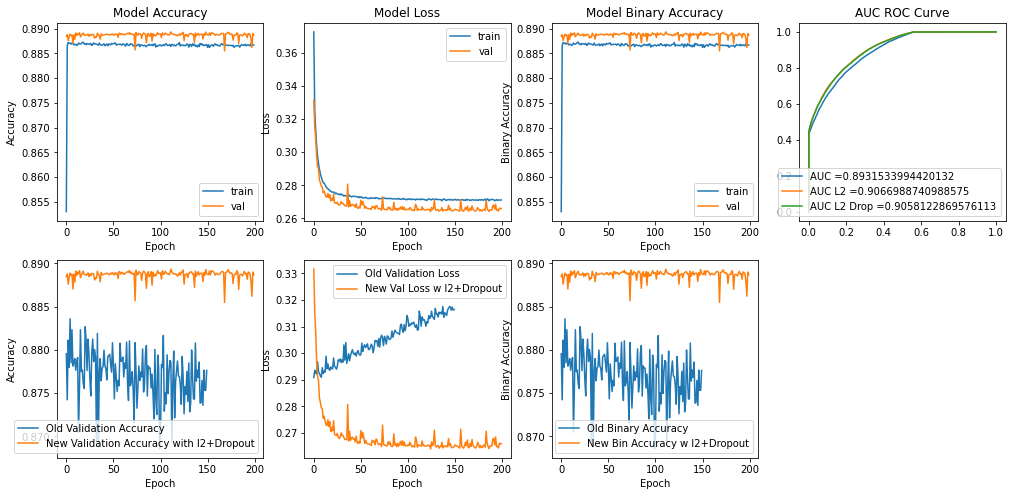

In [73]:
plt.figure(figsize=(17,8))
plt.subplot(2, 4, 1)
plt.plot(history_l2_drop.history['acc'])
plt.plot(history_l2_drop.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2, 4, 2)
plt.plot(history_l2_drop.history['loss'])
plt.plot(history_l2_drop.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(2, 4, 3)
plt.plot(history_l2_drop.history['binary_accuracy'])
plt.plot(history_l2_drop.history['val_binary_accuracy'])
plt.title('Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')


# Comparing the existing and the previous models
plt.subplot(2, 4, 5)
plt.plot(history2.history['val_acc'])
plt.plot(history_l2_drop.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Validation Accuracy', 'New Validation Accuracy with l2+Dropout'], loc='lower right')

plt.subplot(2, 4, 6)
plt.plot(history2.history['val_loss'])
plt.plot(history_l2_drop.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Old Validation Loss', 'New Val Loss w l2+Dropout'], loc='upper right')

plt.subplot(2, 4, 7)
plt.plot(history2.history['val_binary_accuracy'])
plt.plot(history_l2_drop.history['val_binary_accuracy'])
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Binary Accuracy', 'New Bin Accuracy w l2+Dropout'], loc='lower right')

plt.subplot(2, 4, 4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.plot(fpr_l2,tpr_l2,label="AUC L2 ="+str(auc_l2))
plt.plot(fpr_l2_drop,tpr_l2_drop,label="AUC L2 Drop ="+str(auc_l2_drop))
plt.title('AUC ROC Curve')
plt.legend(loc=4)

In [74]:
# Making predictions
y_pred_l2_drop = classifier_l2_drop.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred_l2_drop))
print(classification_report(y_test, y_pred_l2_drop))

[[ 6802  8703]
 [    1 63538]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.61     15505
           1       0.88      1.00      0.94     63539

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



> **Evaluate Forth Model Performance:**  With the addition of the "dropout" parameter we a small improvement in the "f1_score" for class "0". Additionally from the graphs you can observe the the noise, large changes in accuracy and loss figures, in this model is reduced.

### 5.6 Fifth Model - Final Model

> However I feel that the "f1_score" for "class 0" should be higher still, especially when considering that we are trying to predict which borrows will default. Therefore we will use "RandomOverSampler" from the "imlearm" package to balance out the dataset.

In [75]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=88)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
yvals, counts = np.unique(y_test, return_counts=True)
yvals_ros, counts_ros = np.unique(y_resampled, return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)),'\n',
      'Classes in rebalanced test set:',dict(zip(yvals_ros, counts_ros)))

Classes in test set: {0: 15505, 1: 63539} 
 Classes in rebalanced test set: {0: 254157, 1: 254157}


In [76]:
classifier_besttune = Sequential()

# rebuilding this time doing dropout for every layer
classifier_besttune.add(Dense(units = 83, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(X_train.shape[-1],)))
classifier_besttune.add(Dropout(0.1))
classifier_besttune.add(Dense(units = 83, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
classifier_besttune.add(Dropout(0.1))
classifier_besttune.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_besttune.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'accuracy'])

# Fitting the ANN to the Training set (No early Stopping)
history_besttune = classifier_besttune.fit(X_resampled, y_resampled, validation_split=0.2, batch_size = 512, 
                                         epochs = 200, class_weight=class_weights, verbose = 0)

## Section 6: Evaluating Final Model Performance.

In [77]:
y_pred_proba_best = classifier_besttune.predict_proba(X_test)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)

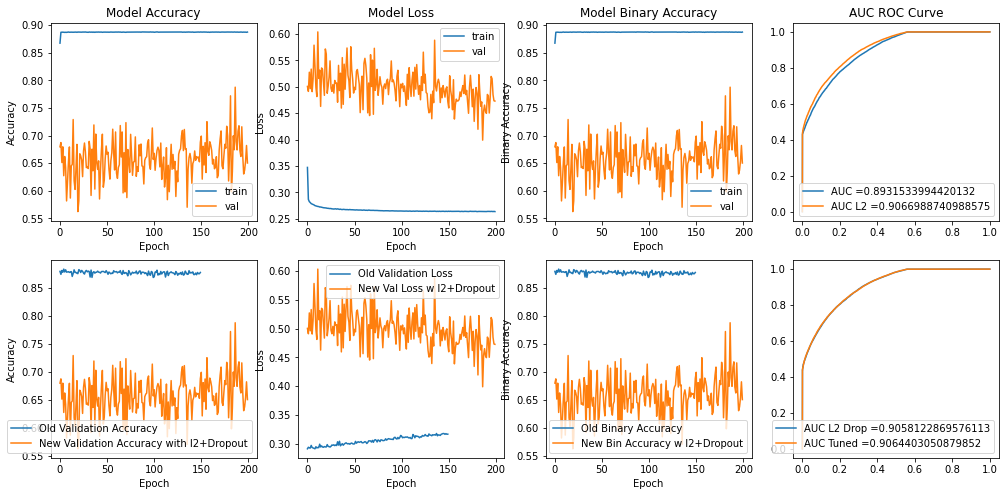

In [78]:
plt.figure(figsize=(17,8))
plt.subplot(2, 4, 1)
plt.plot(history_l2.history['acc'])
plt.plot(history_besttune.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2, 4, 2)
plt.plot(history_l2.history['loss'])
plt.plot(history_besttune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(2, 4, 3)
plt.plot(history_l2.history['binary_accuracy'])
plt.plot(history_besttune.history['val_binary_accuracy'])
plt.title('Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')


# Comparing the existing and the previous models
plt.subplot(2, 4, 5)
plt.plot(history2.history['val_acc'])
plt.plot(history_besttune.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Validation Accuracy', 'New Validation Accuracy with l2+Dropout'], loc='lower right')

plt.subplot(2, 4, 6)
plt.plot(history2.history['val_loss'])
plt.plot(history_besttune.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Old Validation Loss', 'New Val Loss w l2+Dropout'], loc='upper right')

plt.subplot(2, 4, 7)
plt.plot(history2.history['val_binary_accuracy'])
plt.plot(history_besttune.history['val_binary_accuracy'])
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Binary Accuracy', 'New Bin Accuracy w l2+Dropout'], loc='lower right')

plt.subplot(2, 4, 4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.plot(fpr_l2,tpr_l2,label="AUC L2 ="+str(auc_l2))
plt.title('AUC ROC Curve')
plt.legend(loc=4)

plt.subplot(2, 4, 8)
plt.plot(fpr_l2_drop,tpr_l2_drop,label="AUC L2 Drop ="+str(auc_l2_drop))
plt.plot(fpr_best, tpr_best,label="AUC Tuned ="+str(auc_best))
plt.legend(loc=4)

In [79]:
y_pred_best = classifier_besttune.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[10189  5316]
 [ 5407 58132]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     15505
           1       0.92      0.91      0.92     63539

    accuracy                           0.86     79044
   macro avg       0.78      0.79      0.79     79044
weighted avg       0.86      0.86      0.86     79044



> The end result is that we did manage to further improve the "f1_score" for classification of "class 0" from 62% to 64%, with a significant increase:
- in the recall score for "class 0" (False Positive)
- in the precision score for "class 1" (False Negative)

> However there has been in a drop in the "f1_score" for "class 1", specifically a drop in:
- in precision score for "class 0" (True Negative)
- in the recall score for "class 1" (True Positives)

> Improvement of the prediction power of the model in one area seems to have come at the cost of the performance in other areas.


In [80]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           6000.00 
term                36.00   
int_rate            15.31   
installment         208.91  
annual_inc          44000.00
                      ...   
48052               0.00    
70466               0.00    
86630               0.00    
93700               0.00    
earliest_cr_year    2002.00 
Name: 176039, Length: 82, dtype: float64

In [81]:
classifier_besttune.predict_classes(new_customer.values.reshape(1,82))

array([[1]], dtype=int32)

> Now to use the model to produce a recommendation on if we should lend to a borrower or not!

In [82]:
df.iloc[random_ind]['loan_repaid']

1.0

# Conclusion

In [83]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66     15505
           1       0.92      0.91      0.92     63539

    accuracy                           0.86     79044
   macro avg       0.78      0.79      0.79     79044
weighted avg       0.86      0.86      0.86     79044



The best "f1_score" for "class 0" of 66% was acheieved using an "Artifical Neural Network" (ANN) with random oversampling of the dataset, to mitigate against the clear imbalances in the dataset. However by focusing the predictive power of the model on the "f1_score" for "class 0" there has been compromises in the performance of the model in other areas. 

[[ 3387 -3387]
 [ 5406 -5406]]


Text(0, 0.5, 'True')

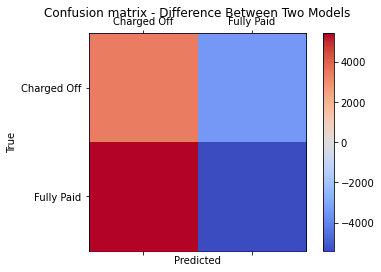

In [84]:
labels = ['Charged Off','Fully Paid']
cm = (confusion_matrix(y_test, y_pred_best) - confusion_matrix(y_test, y_pred_l2_drop))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap = 'coolwarm')
plt.title('Confusion matrix - Difference Between Two Models')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

Reviewing the actual numbers of the confusion matrix's from before and after using the "oversampling" method, you can see that the latest model is simply predicting a lot more borrowers as people who could potentially default on their loans. 

As the objective of this project was focused on predicting borrower defaults, such a compromise would be considered acceptable.